<a href="https://colab.research.google.com/github/Akasonal/Tweet-Classification-using-BERT/blob/main/Disastrous_tweet_classification_using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,Dense,SpatialDropout1D,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data.columns #printing all the columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [4]:
data.shape

(7613, 5)

In [5]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
(data.dtypes[data.dtypes=='object']).describe()

count          3
unique         1
top       object
freq           3
dtype: object

In [7]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


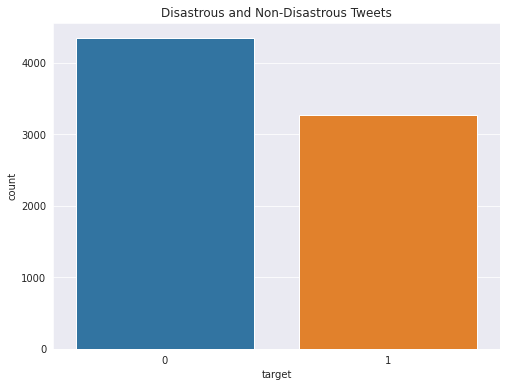

In [9]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
sns.countplot(data['target'])
plt.title('Disastrous and Non-Disastrous Tweets')
plt.show()

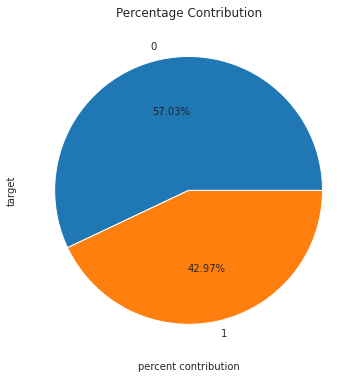

In [10]:
plt.figure(figsize=(6,8))
sns.set_style("darkgrid")
data['target'].value_counts().plot.pie(autopct='%0.2f%%')
plt.title("Percentage Contribution")
plt.xlabel("percent contribution")
plt.ylabel("target")
plt.show()

In [11]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-jrsnkp5t
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-jrsnkp5t
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=dcfac1a5e2f0d9d603ca1355580cc009c2a0f7d233fef08c575a3505f44fd229
  Stored in directory: /tmp/pip-ephem-wheel-cache-5t4f0i1n/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [12]:
import preprocess_kgptalkie as akhil

In [13]:
df=akhil.get_basic_features(data)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


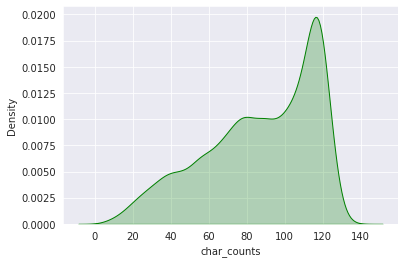

In [14]:
sns.kdeplot(df['char_counts'],shade=True,color='green')
plt.show()

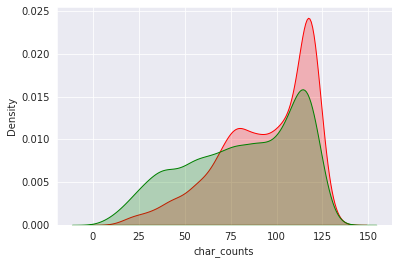

In [15]:

sns.kdeplot(df[df['target']==1]
            ['char_counts'],color='red',shade=True)
sns.kdeplot(df[df['target']==0]
            ['char_counts'],color='green',shade=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


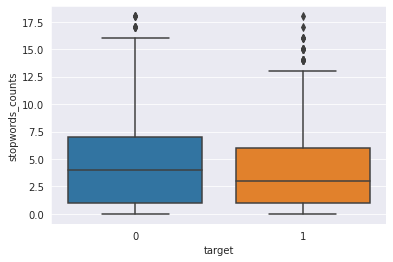

In [16]:
sns.boxplot(data['target'],y=data['stopwords_counts'])
plt.show()

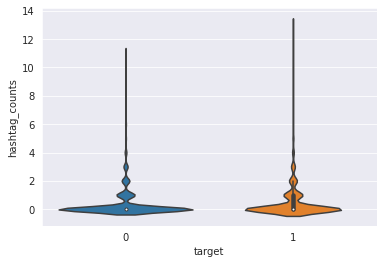

In [17]:
sns.violinplot(x=data['target'],y=data['hashtag_counts'])
plt.show()

In [18]:
freq_occuring=akhil.get_word_freqs(data,'text')

In [19]:
top_20=freq_occuring[:20]
top_20

the     2575
a       1845
to      1805
in      1757
of      1722
and     1302
I       1197
for      820
is       814
on       773
-        763
you      632
The      552
my       549
with     508
that     492
at       485
by       469
it       433
from     372
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


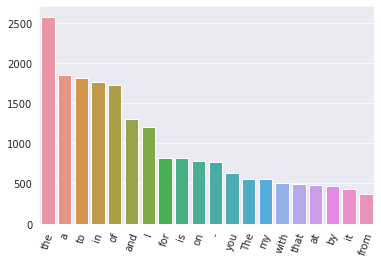

In [20]:
sns.barplot(top_20.index,top_20.values)
plt.xticks(rotation=70)
plt.show()

In [21]:
least_20=freq_occuring[-20:]
least_20


http://t.co/8JymD9YPSJ    1
http://t.co/tFeaNwhH2h    1
http://t.co/hdAhLgrprl    1
http://t.co/dXVtgi1BvO    1
http://t.co/daPlllFuqK    1
(Photos)....              1
Scars                     1
topic                     1
@violentfeminazi          1
#Chester                  1
Reagan                    1
raynor.                   1
introducing               1
http://t.co/41L8tqCAey    1
Africa's                  1
@5SOS                     1
Dr                        1
http://t.co/KEfxTjTAKB    1
@YMcglaun                 1
call.                     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


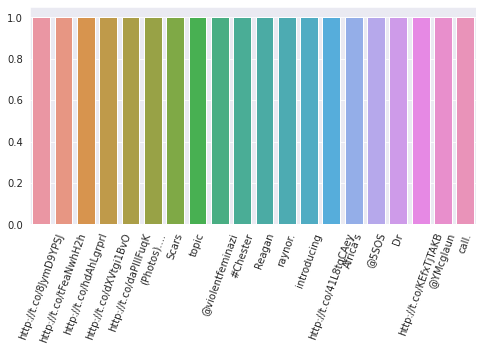

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(least_20.index,least_20.values)
plt.xticks(rotation=70)
plt.show()

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def cleaner(text):
    cleaned=text.replace("//"," ")
    cleaned=cleaned.replace('.'," ")
    cleaned=re.sub(r'[^a-zA-Z]'," ",cleaned)
    cleaned=cleaned.strip() #removing whitespace
    cleaned=cleaned.lower() #converting into lower case words
    cleaned=re.sub(r'\w+\d+'," ",cleaned)#remove alphanumeric words
    cleaned=ps.stem(cleaned) #stemming 
    cleaned=[word for word in cleaned.split() if len(word)>2]
    cleaned=" ".join(cleaned)
    return cleaned

In [25]:
data['text']=data['text'].apply(lambda text: cleaner(text))

In [26]:
data['text'][0:10]

0    our deeds are the reason this earthquake may a...
1                   forest fire near ronge sask canada
2    all residents asked shelter place are being no...
3    people receive wildfires evacuation orders cal...
4    just got sent this photo from ruby alaska smok...
5    rockyfire update california hwy closed both di...
6    flood disaster heavy rain causes flash floodin...
7               top the hill and can see fire the wood
8    there emergency evacuation happening now the b...
9              afraid that the tornado coming our area
Name: text, dtype: object

In [27]:
from wordcloud import WordCloud,STOPWORDS
word_cloud=akhil.get_word_freqs(data[data['target']==1],'text')
word_cloud.index

Index(['http', 'the', 'and', 'for', 'from', 'that', 'with', 'this', 'after',
       'fire',
       ...
       'condemning', 'amman', 'owia', 'mentality', 'kofytkdx', 'peacetime',
       'har', 'cuihib', 'changed', 'rotation'],
      dtype='object', length=11470)

Index(['http', 'the', 'and', 'for', 'from', 'that', 'with', 'this', 'after',
       'fire',
       ...
       'condemning', 'amman', 'owia', 'mentality', 'kofytkdx', 'peacetime',
       'har', 'cuihib', 'changed', 'rotation'],
      dtype='object', length=11470)


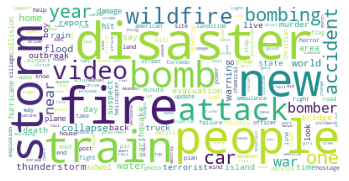

In [28]:
from wordcloud import WordCloud,STOPWORDS
dataset=akhil.get_word_freqs(data[data['target']==1],'text')
print(dataset.index)
dataset=" ".join(dataset.index)
word_cloud=WordCloud(max_font_size=60,background_color='white').generate(dataset)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Index(['http', 'the', 'and', 'you', 'for', 'that', 'with', 'this', 'https',
       'like',
       ...
       'production', 'infected', 'xrc', 'rnbk', 'nrdq', 'raz', 'shestooyoung',
       'destiel', 'kbltcxz', 'rwrabbit'],
      dtype='object', length=14292)


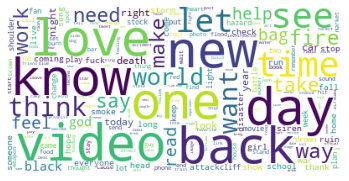

In [29]:
from wordcloud import WordCloud,STOPWORDS
dataset=akhil.get_word_freqs(data[data['target']==0],'text')
print(dataset.index)
dataset=" ".join(dataset.index)
word_cloud=WordCloud(max_font_size=60,background_color='white').generate(dataset)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [30]:
! pip install ktrain

In [31]:
import ktrain
from ktrain import  text

In [32]:
(x_train,y_train),(x_test,y_test),preprocess=text.texts_from_df(data,text_column='text',
                                                                label_columns='target',
                                                                maxlen=50,
                                                                preprocess_mode='bert')

['not_target', 'target']
      not_target  target
5512         0.0     1.0
1084         1.0     0.0
6180         0.0     1.0
645          1.0     0.0
2479         1.0     0.0
['not_target', 'target']
      not_target  target
6585         0.0     1.0
4674         1.0     0.0
5797         0.0     1.0
6447         0.0     1.0
6511         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [33]:
model=text.text_classifier('bert',train_data=(x_train,y_train),preproc=preprocess)

Is Multi-Label? False
maxlen is 50
done.


In [36]:
learner=ktrain.get_learner(model,train_data=(x_train,y_train),val_data=(x_test,y_test),batch_size=64)

In [39]:
learner.fit_onecycle(lr=2e-5,epochs=4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
108/108 [==============================] - 137s 1s/step - loss: 0.6831 - accuracy: 0.5713 - val_loss: 0.6858 - val_accuracy: 0.5617
Epoch 2/4
108/108 [==============================] - 137s 1s/step - loss: 0.6832 - accuracy: 0.5713 - val_loss: 0.6855 - val_accuracy: 0.5617
Epoch 3/4
108/108 [==============================] - 137s 1s/step - loss: 0.6832 - accuracy: 0.5713 - val_loss: 0.6862 - val_accuracy: 0.5617
Epoch 4/4
108/108 [==============================] - 137s 1s/step - loss: 0.6833 - accuracy: 0.5713 - val_loss: 0.6860 - val_accuracy: 0.5617


In [43]:
prediction=ktrain.get_predictor(learner.model,preprocess)
data=["US did this! Loudly crying faceLoudly crying face"]
prediction.predict(data)

['not_target']